# Exercício 8

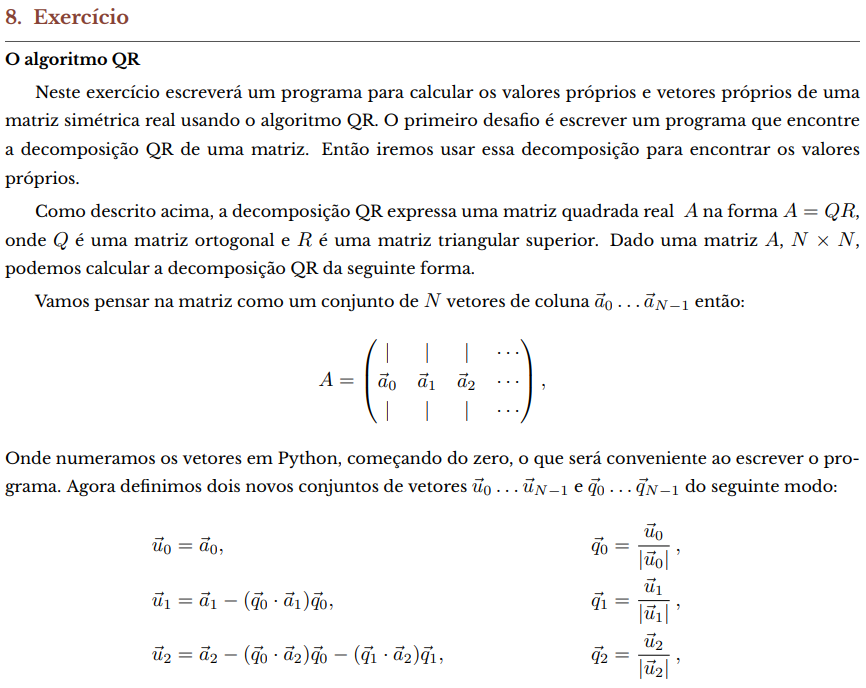
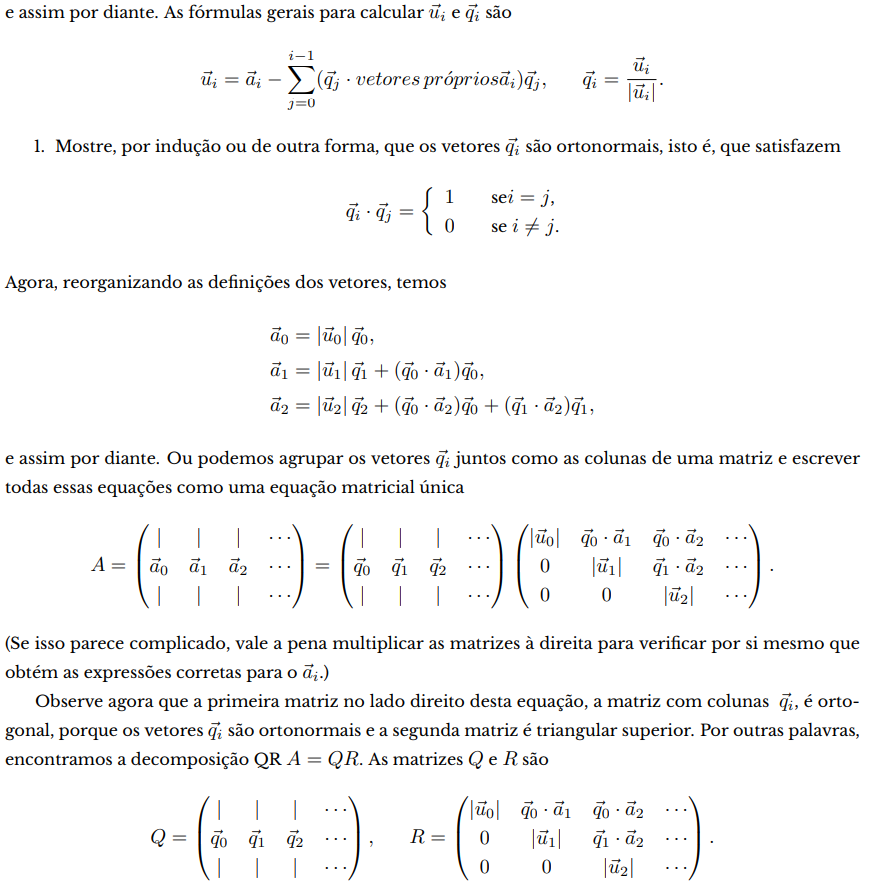
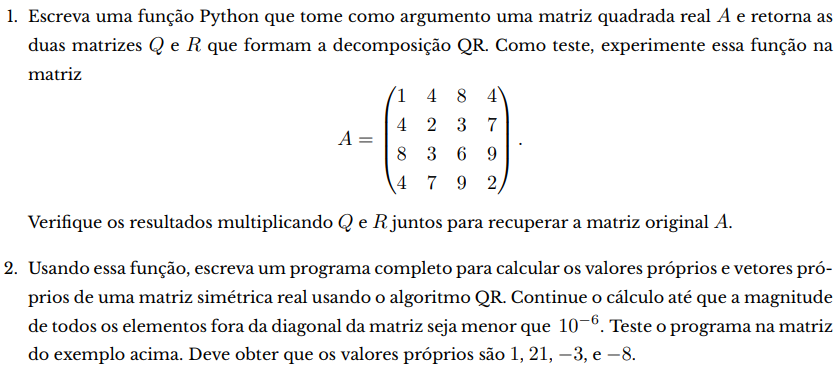

In [31]:
import numpy as np

## Alínea 1

[Aqui](https://www.notion.so/guilhermebaos/12-Decomposi-o-QR-0faa697c7b0b4d24948a6ea22e4ba7a4?pvs=4#5ca91469988d4deba1dfb95d75bac848).

## Alínea 2

## Decomposição QR

In [32]:
def qrgram(Ao: np.ndarray, needR: bool=True) -> tuple[np.ndarray, np.ndarray]:
    """
        Dado uma matriz quadrada Ao calcula a sua decomposição QR usando o método de Gram-Schmidt.
        
        ### Argumentos
        Ao: Matriz a decompor
        needR: Calcula R se needR = True

        ### Retorno
        Q: Matriz Q da decomposição QR
        R: Matriz R da decomposição QR (caso needR=False devolve uma matriz com zeros)
    """

    # Evitar side effects
    A = np.copy(Ao)

    N = A.shape[0]
    Q, R = np.zeros((N, N)), np.zeros((N, N))
    
    # Iteramos sobre as colunas
    for i in range(0, N):
        v_i = np.copy(A[:, i])
        for j in range(0, i):
            v_i -= (Q[:, j] @ A[:, i]) * Q[:, j]

        Q[:, i] = v_i / np.linalg.norm(v_i)

    if needR:
        R = Q.transpose() @ A
    
    return Q, R

In [33]:
A = np.array([[1, 4, 8, 4], [4, 2, 3, 7], [8, 3, 6, 9], [4, 7, 9, 2]], dtype=np.float64)

print(A)
print("")
Q, R = qrgram(A)
print("")

# Verificar que Q é ortogonal
print(Q @ Q.transpose(), "\n")

# Verificar que R é triangular superior
print(R, "\n")

# Verificar que a decomposição Q, R é válida
print(Q @ R, "\n")

[[1. 4. 8. 4.]
 [4. 2. 3. 7.]
 [8. 3. 6. 9.]
 [4. 7. 9. 2.]]


[[ 1.00000000e+00 -1.89077499e-15  3.63925466e-16  9.03501038e-16]
 [-1.89077499e-15  1.00000000e+00 -1.01273699e-15 -5.40368453e-16]
 [ 3.63925466e-16 -1.01273699e-15  1.00000000e+00  8.91194757e-16]
 [ 9.03501038e-16 -5.40368453e-16  8.91194757e-16  1.00000000e+00]] 

[[ 9.84885780e+00  6.49821546e+00  1.05596001e+01  1.13718770e+01]
 [-3.55271368e-15  5.98106979e+00  8.42348360e+00 -4.84345998e-01]
 [ 5.32907052e-15  1.50990331e-14  2.74586406e+00  3.27671222e+00]
 [-1.69864123e-14 -1.51822999e-14 -2.83384427e-14  3.11592335e+00]] 

[[1. 4. 8. 4.]
 [4. 2. 3. 7.]
 [8. 3. 6. 9.]
 [4. 7. 9. 2.]] 



## Autovetores

In [34]:
def eigenfinder(Ao: np.ndarray, eps: float=1e-06) -> tuple[np.ndarray, np.ndarray]:
    """
        Devolve os autovalores e autovetores de uma matriz Ao simétrica usando decomposição QR iterada.
        Termina quando a soma dos valores absolutos dos elementos fora da diagonal for menor que eps.
        
        ### Argumentos
        Ao: Matriz simétrica N por N cujos autovalores e autovetores queremos obter
        eps: Erro máximo permitido

        ### Retorno
        eigenvalues: Array com os N autovalores
        eigenvectors: Matriz N por N cujas colunas são os respetivos autovetores normalizados
    """

    # Evitar side-effects
    A = np.copy(Ao)
    N = A.shape[0]

    # Registar os autovalores
    QTotal = np.identity(N)

    # Executar um passo da iteração
    erro = eps + 1
    while erro > eps:
        Q, R = qrgram(A, needR=False)

        A = Q.transpose() @ A @ Q
        QTotal = QTotal @ Q

        # Somar o módulo dos items fora da diagonal principal
        erro = np.sum(np.abs(A)) - np.sum([np.abs(A[i][i]) for i in range(A.shape[0])])
    
    eigenvalues = np.array([A[i, i] for i in range(N)])
    eigenvectors = QTotal

    # Normalizar os autovalores
    for i in range(N):
        eigenvectors[:, i] = eigenvectors[:, i] / np.linalg.norm(eigenvectors[:, i])

    return eigenvalues, eigenvectors

In [35]:
val, vec = eigenfinder(A)

# Verificar os autovetores
for i in range(A.shape[0]):
    res = A @ vec[:, i]

    print(f"{val[i]:.2f}")
    print(vec[:, i])
    print(res)
    print(res / vec[:, i], "\n\n")

21.00
[0.43151697 0.38357065 0.6233023  0.52740963]
[ 9.06185643  8.05498343 13.08934809 11.07560231]
[21.00000025 20.99999968 20.99999976 21.00000033] 


-8.00
[ 0.38357065 -0.43151697 -0.52740963  0.62330229]
[-3.06856505  3.45213585  4.21927718 -4.98641822]
[-7.99999964 -8.00000026 -8.00000032 -7.99999978] 


-3.00
[ 0.77459667  0.25819889 -0.25819889 -0.51639778]
[-2.32378999 -0.77459669  0.77459665  1.54919336]
[-2.99999999 -3.00000006 -2.99999997 -3.00000002] 


1.00
[-0.25819889  0.77459667 -0.51639778  0.25819889]
[-0.25819889  0.77459667 -0.51639778  0.25819889]
[1.00000002 1.         1.         1.00000001] 


